<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/Random_MMC_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random M/M/C Queue**

A Random M/M/C queue is a queuing model used to analyze the behavior of queuing systems with multiple servers (C servers) and customer arrival following a Poisson process (M) and exponential service times (M), where the order of customer service is random.

In [1]:
!pip install simpy

In [2]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt
import random as rd

To implement this queue model, it was necessary to create an extra class that represents customers, so that it is possible to differentiate each customer individually and serve them randomly. The attributes of this class are its "id" (in order to differentiate them), the time at which the customer arrives, and the time at which he is served.



In [3]:
class Customer:

  def __init__(self, id, arrive):
    self.id = id
    self.arrive = arrive
    self.service = 0

  def do_service(self, service):
    self.service = service

  def __repr__(self) -> str:
    return f"id={self.id}, arrive={self.arrive}, service={self.service}"


In [4]:
class RandomMMCQueue:

  def __init__(self, arrival_rate, service_rate, max_resources, horizon, show=False):
    self.env = sp.Environment()
    self.n = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.max_resources = max_resources
    self.horizon = horizon
    self.show = show
    self.people = []
    self.queue_history = []
    self.next_id = 0
    self.times_queue = []
    self.people_queue = []

  def arrive(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))
      self.n += 1

      customer = Customer(self.next_id, self.env.now)

      self.people.append(customer)
      self.queue_history.append(customer)
      self.next_id +=1

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone arrive!\n- n = {self.n}, t = {self.env.now})\n")

      if self.n == 1:
        self.env.process(self.service())

  def service(self):
    while self.n > 0:
      yield self.env.timeout(np.random.exponential(1/self.service_rate))

      if self.n - self.max_resources >= 0:
        self.n -= self.max_resources

        people_served = rd.sample(self.people, k=self.max_resources)

        for served in people_served:
          served.do_service(self.env.now)
          self.people.remove(served)

      else:
        self.n = 0

        for served in self.people:
          served.do_service(self.env.now)
        self.people.clear()

      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.show:
        print(f"Someone was attended to!\n- n = {self.n}, t = {self.env.now})\n")

  def show_historic(self):
    print("Queue historic:")
    for customer in self.queue_history:
      print(f"- {customer}")
    print()

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    self.show_historic()

    print("End of simulation!")

Example of simulation using arrival rate of 7 people per minute, service rate of 5 people per minute, in a period (horizon) of 30 minutes in system with 3 servers. It's possible to see the size of the queue when someone arrives or leaves.

In [8]:
arrival_rate = 7
service_rate = 5
max_resources = 3
horizon = 30

random_mmc_queue = RandomMMCQueue(arrival_rate, service_rate, max_resources, horizon, True)

random_mmc_queue.run_simulation()

Someone arrive!
- n = 1, t = 0.3844380103325622)

Someone arrive!
- n = 2, t = 0.4616553899646158)

Someone arrive!
- n = 3, t = 0.5025283309794799)

Someone arrive!
- n = 4, t = 0.5989463744773605)

Someone arrive!
- n = 5, t = 0.6585027910138139)

Someone arrive!
- n = 6, t = 0.705593399292367)

Someone arrive!
- n = 7, t = 0.7258075129508302)

Someone arrive!
- n = 8, t = 0.8247944225102553)

Someone arrive!
- n = 9, t = 0.9783300149470076)

Someone was attended to!
- n = 6, t = 1.1719257390034168)

Someone was attended to!
- n = 3, t = 1.3473965216068042)

Someone was attended to!
- n = 0, t = 1.540054630326432)

Someone arrive!
- n = 1, t = 1.729692189418653)

Someone was attended to!
- n = 0, t = 1.7945489114050777)

Someone arrive!
- n = 1, t = 1.8388787213779794)

Someone arrive!
- n = 2, t = 1.8413955564629672)

Someone was attended to!
- n = 0, t = 2.108169182857024)

Someone arrive!
- n = 1, t = 2.144651783259202)

Someone was attended to!
- n = 0, t = 2.1783574820766742)

S

Below there is a graph showing how the queue behaves over time.

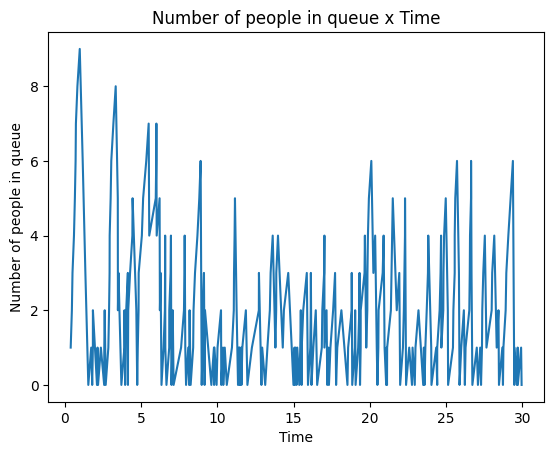

In [9]:
plt.plot(random_mmc_queue.times_queue, random_mmc_queue.people_queue)
plt.title("Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()